# Curve Similarity Analysis - Cases
- **Created by: Andrés Segura Tinoco**
- **Created on: May 12, 2020**
- **Data: Cases of Covid 19**

**Packages Installation**
``` console
conda config --set pip_interop_enabled True
pip install similaritymeasures
```

**Methods:**
1. Mean Absolute Error
2. Partial Curve Mapping
3. Discrete Frechet distance
4. Area between two Curves
5. Curve Length Similarity
6. Dynamic Time Warping distance

## 1. Read C19 cases by country

In [1]:
# # Import libraries
import pandas as pd
import numpy as np
import math
import similaritymeasures
from collections import Counter

In [2]:
# Load visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Reading data from CSV file
dataURL = "../data/country_cases_by_days.csv"
raw_data = pd.read_csv(dataURL)

In [4]:
# Show first 10 rows of header dataframe
raw_data.head(10)

,country,region,1,2,3,4,5,6,7,8,...,125,126,127,128,129,130,131,132,133,134
0,USA,Americas,15,15,15,15,15,15,35,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil,Americas,1,1,1,1,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Spain,Europe,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Russia,Europe,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UK,Europe,9,9,9,9,9,9,9,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Italy,Europe,3,3,3,3,3,4,21,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,France,Europe,12,12,12,12,12,12,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Germany,Europe,16,16,16,16,16,16,16,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Peru,Americas,1,6,7,9,11,17,22,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Iran,Asia,2,5,18,29,43,61,95,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Calculate the Similarity between Countries

In [5]:
# Control variables
cnt = Counter()
top_country = 10
n_days = 90
n_methods = 6

# Analysis variables
exp_country = 'Colombia'
exp_data = np.zeros((n_days, 2))
countries_data = dict()
countries_region = dict()

In [6]:
# Split data between expected and reality datasets
for ix, row in raw_data.iterrows():
    country_name = row["country"]
    countries_region[country_name] = row["region"]
    y = []
    
    for i in range(1, n_days + 1):
        if pd.notna(row[str(i)]):
            y.append(int(row[str(i)]))
        else:
            break
    
    if country_name == exp_country:    
        exp_data[:, 0] = np.arange(n_days)
        exp_data[:, 1] = y
    else:
        if len(y) == n_days:
            temp_data = np.zeros((n_days, 2))
            temp_data[:, 0] = np.arange(n_days)
            temp_data[:, 1] = y
            countries_data[country_name] = temp_data

### 2.1. Mean Absolute Error

In [7]:
mae_result = dict()
for country, num_data in countries_data.items():
    mae = 0
    for ix in range(0, n_days):
        mae += abs(exp_data[ix, 1] - num_data[ix, 1])
    mae_result[country] = mae / n_days

In [8]:
# Get and save top N
output = sorted(mae_result, key=mae_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, mae_result[country]))

South Africa: 726.0888888888888
Indonesia: 1125.2777777777778
Sweden: 1475.3444444444444
Ukraine: 1476.1444444444444
Romania: 2057.366666666667
Singapore: 2148.8
Dominican Republic: 2539.866666666667
Poland: 2711.233333333333
Belarus: 2927.1555555555556
UAE: 3070.733333333333


### 2.2. Partial Curve Mapping

In [9]:
# Quantify the difference between the two curves using PCM
pcm_result = dict()
for country, num_data in countries_data.items():
    pcm = similaritymeasures.pcm(exp_data, num_data)
    pcm_result[country] = pcm

In [10]:
# Get and save top N
output = sorted(pcm_result, key=pcm_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, pcm_result[country]))

South Africa: 1.1501364780202334
Sweden: 1.7492893280047972
Indonesia: 2.162399762350027
Ukraine: 3.036089768470755
Poland: 3.6212094546638927
Belarus: 3.726513401988682
Singapore: 3.9389742238625423
Ireland: 5.171307532824087
Romania: 5.197180734472803
Kuwait: 5.52286342837639


### 2.3. Discrete Frechet distance

In [11]:
### Quantify the difference between the two curves using Discrete Frechet distance
df_result = dict()
for country, num_data in countries_data.items():
    df = similaritymeasures.frechet_dist(exp_data, num_data)
    df_result[country] = df

In [12]:
# Get and save top N
output = sorted(df_result, key=df_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, df_result[country]))

Portugal: 1178.1871667948178
Switzerland: 1273.5375926921042
Sweden: 3251.0001537988273
South Africa: 3979.0
Singapore: 5735.0000871839575
Indonesia: 6060.000082508251
Ecuador: 6638.0
Ireland: 6992.000071510297
Belarus: 7123.0
Poland: 7668.000065206051


### 2.4. Area between two Curves

In [13]:
# Quantify the difference between the two curves using Area between two Curves
area_result = dict()
for country, num_data in countries_data.items():
    area = similaritymeasures.area_between_two_curves(exp_data, num_data)
    area_result[country] = area

In [14]:
# Get and save top N
output = sorted(area_result, key=area_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, area_result[country]))

South Africa: 63358.5
Indonesia: 98234.5
Ukraine: 128771.5
Sweden: 131154.5
Romania: 178385.0
Singapore: 190489.0
Dominican Republic: 220936.0
Poland: 240177.0
Belarus: 259881.5
UAE: 270988.0


### 2.5. Curve Length Similarity

In [15]:
# Quantify the difference between the two curves using Curve Length based similarity measure
cl_result = dict()
for country, num_data in countries_data.items():
    cl = similaritymeasures.curve_length_measure(exp_data, num_data)
    cl_result[country] = cl

In [16]:
# Get and save top N
output = sorted(cl_result, key=cl_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, cl_result[country]))

South Africa: 1.2341372183605872
Sweden: 1.3034691857576273
Indonesia: 2.044955068132959
Belarus: 2.5194767370080475
Ukraine: 2.6160545402180024
Poland: 2.661454814619722
Ireland: 2.741628104256315
Singapore: 2.904564755859532
Ecuador: 3.7484133715509325
Romania: 3.7960728216652537


### 2.6. Dynamic Time Warping distance

In [17]:
# Quantify the difference between the two curves using Dynamic Time Warping distance
dtw_result = dict()
for country, num_data in countries_data.items():
    dtw, d = similaritymeasures.dtw(exp_data, num_data)
    dtw_result[country] = dtw

In [18]:
# Get and save top N
output = sorted(dtw_result, key=dtw_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, dtw_result[country]))

South Africa: 18982.75462032749
Sweden: 22492.431442031502
Portugal: 27891.4689393934
Switzerland: 30831.32139038094
Indonesia: 32940.05976946566
Singapore: 35386.6103020293
Belarus: 44676.00109493165
Ireland: 45268.87067342326
Poland: 45471.34107760644
Ukraine: 47153.58840617092


## 3. Plot Similarity Results

In [19]:
cnt.most_common()

[('South Africa', 6),
 ('Indonesia', 6),
 ('Sweden', 6),
 ('Singapore', 6),
 ('Poland', 6),
 ('Belarus', 6),
 ('Ukraine', 5),
 ('Romania', 4),
 ('Ireland', 4),
 ('Dominican Republic', 2),
 ('UAE', 2),
 ('Portugal', 2),
 ('Switzerland', 2),
 ('Ecuador', 2),
 ('Kuwait', 1)]

In [20]:
# Palette of colores
palette = {"Africa": "#FF7F0E", "Americas": "#D62728", "Asia": "#2CA02C", "Europe": "#1F77B4", "Oceania": "#9467BD"}
bars = []
values= []

for row in cnt.most_common():
    bars.append(row[0])
    values.append(row[1])

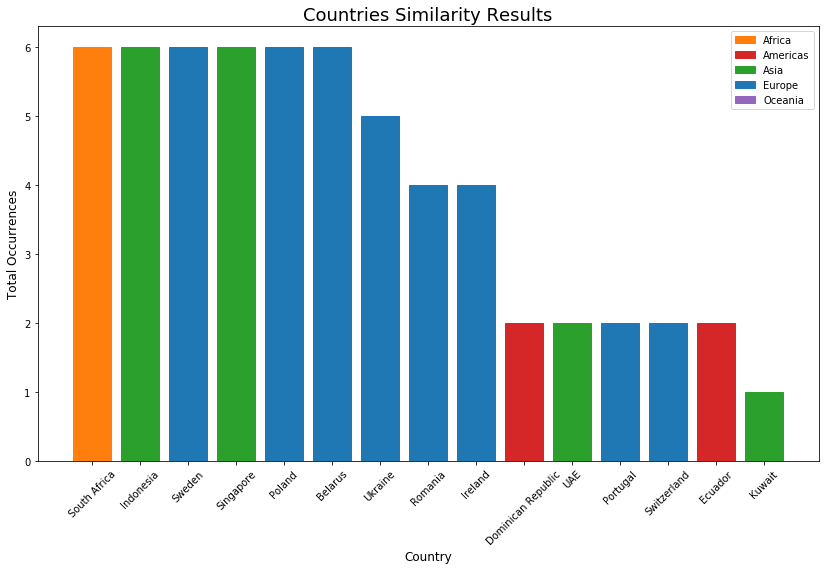

In [21]:
# Plot similarity results
plt.figure(figsize = (14, 8))

barlist = plt.bar(bars, values)
for i, v in enumerate(bars):
    barlist[i].set_color(palette[countries_region[v]])

# Add custom legend
legend_list = []
for k, v in palette.items():
    legend_list.append(mpatches.Patch(color = v, label = k))

# Plot setup
plt.xticks(rotation=45)
plt.title("Countries Similarity Results", fontsize = 18)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Total Occurrences", fontsize = 12)
plt.legend(handles = legend_list, loc = "best")
plt.show()

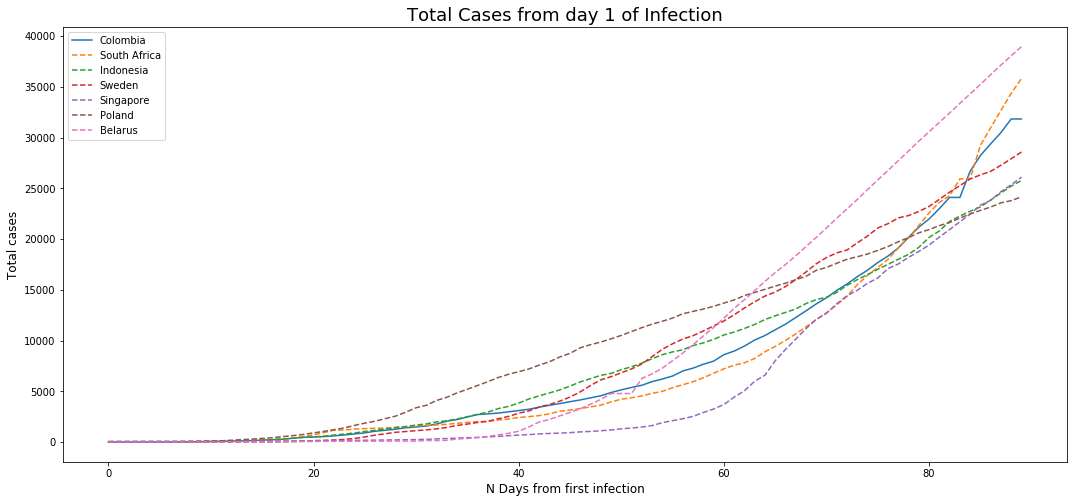

In [22]:
# Plot trends more similar to Colombia
country_list = ['Colombia']

plt.figure(figsize = (18, 8))
plt.plot(exp_data[:, 0], exp_data[:, 1])

for country in cnt:
    if cnt[country] == n_methods:
        country_list.append(country)
        num_data = countries_data[country]
        plt.plot(num_data[:, 0], num_data[:, 1], linestyle='--')

# Plot setup
plt.title("Total Cases from day 1 of Infection", fontsize = 18)
plt.xlabel("N Days from first infection", fontsize = 12)
plt.ylabel("Total cases", fontsize = 12)
plt.legend(country_list, loc = "best")
plt.show()

## References

Jekel, C. F., Venter, G., Venter, M. P., Stander, N., & Haftka, R. T. (2018). Similarity measures for identifying material parameters from hysteresis loops using inverse analysis. International Journal of Material Forming. https://doi.org/10.1007/s12289-018-1421-8

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>